In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [5]:
from pandas_datareader import data, wb 

In [6]:
from datetime import datetime


<br> <br>  In this project I am going to analyse the tech comapanies stock market price from [Yahoo Finace](https://finance.yahoo.com/u/yahoo-finance/watchlists/tech-stocks-that-move-the-market/) real time data souce.<br> You will find I have done few analysis on Google, Tesla, Amazon, Microsoft and Apple like giant companies. Whats there market risk and future Trending Tickers, forecasting in the stock market price.<br> <br> <br>

In [7]:
tech_list = ['GOOG','MSFT','AMZN','TSLA','AAPL']

In [8]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [9]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,189.491746,185.753452,187.619286,187.630635,3.266355e+07,186.056277
std,22.253406,21.979307,22.116442,22.135245,1.414937e+07,21.889572
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,173.052505,169.737499,171.355000,171.032497,2.285825e+07,170.217468
50%,187.349998,184.845001,186.204994,185.955002,2.927620e+07,184.126984
75%,209.312500,205.632496,207.299999,207.645000,3.891910e+07,205.888016
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-03-12 to 2019-03-12
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


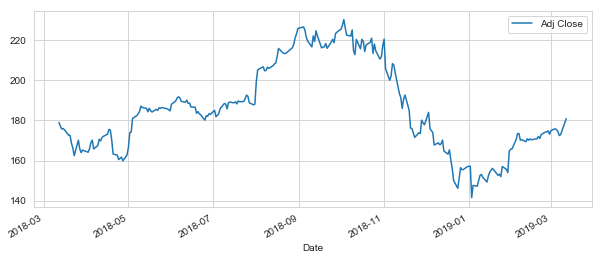

In [12]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

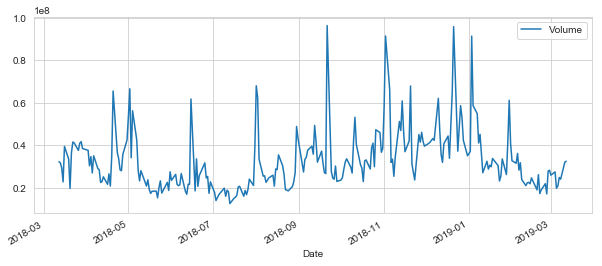

In [13]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [51]:
ma_day = [30]

In [52]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()


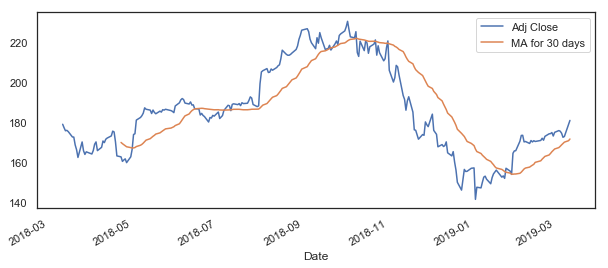

In [54]:
AAPL[['Adj Close','MA for 30 days']].plot(subplots=False,figsize=(10,4))

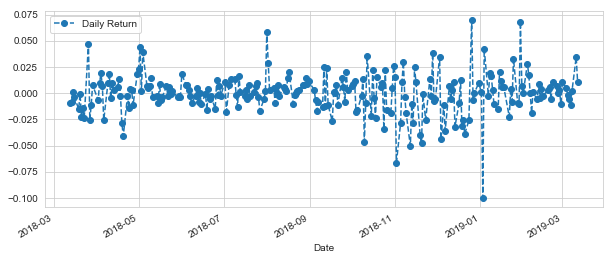

In [17]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\suran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


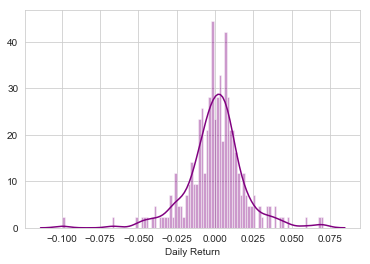

In [18]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

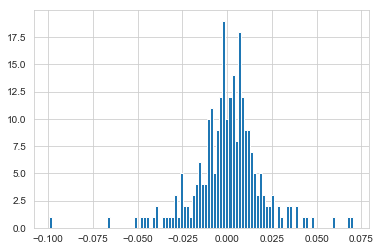

In [19]:
AAPL['Daily Return'].hist(bins=100)

In [20]:
closing_df = data.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [21]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2018-03-12,178.994415,1598.390015,1164.500000,95.163712,345.510010
2018-03-13,177.270660,1588.180054,1138.170044,92.842896,341.839996
2018-03-14,175.763611,1591.000000,1149.489990,92.292183,326.630005
2018-03-15,175.970459,1582.319946,1149.579956,92.616714,325.600006
2018-03-16,175.349915,1571.680054,1135.729980,93.029739,321.350006


In [22]:
# finding the percentage changes for returns per company

tech_returns = closing_df.pct_change().dropna()
tech_returns.head()

Symbols,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2018-03-13,-0.009630,-0.006388,-0.022611,-0.024388,-0.010622
2018-03-14,-0.008501,0.001776,0.009946,-0.005932,-0.044494
2018-03-15,0.001177,-0.005456,0.000078,0.003516,-0.003153
2018-03-16,-0.003526,-0.006724,-0.012048,0.004460,-0.013053
2018-03-19,-0.015279,-0.017020,-0.031618,-0.018076,-0.024242


C:\Users\suran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


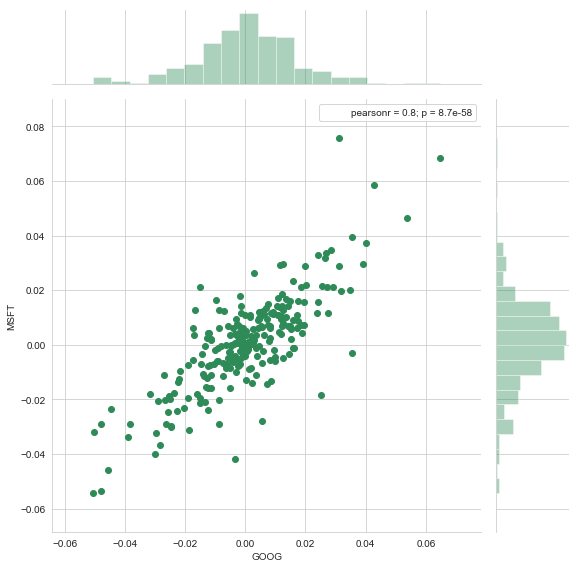

In [37]:
import scipy.stats as sci
sns.jointplot('GOOG','MSFT',tech_returns,kind="scatter",color='seagreen',height=8,stat_func=sci.pearsonr)
# sns.jointplot("GOOG", "MSFT", data=tech_returns, kind='kde')


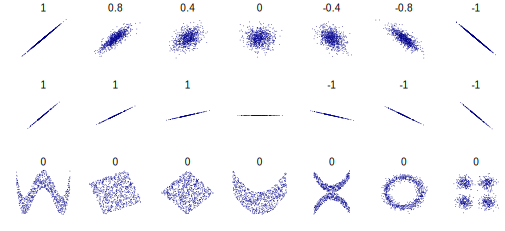

In [38]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

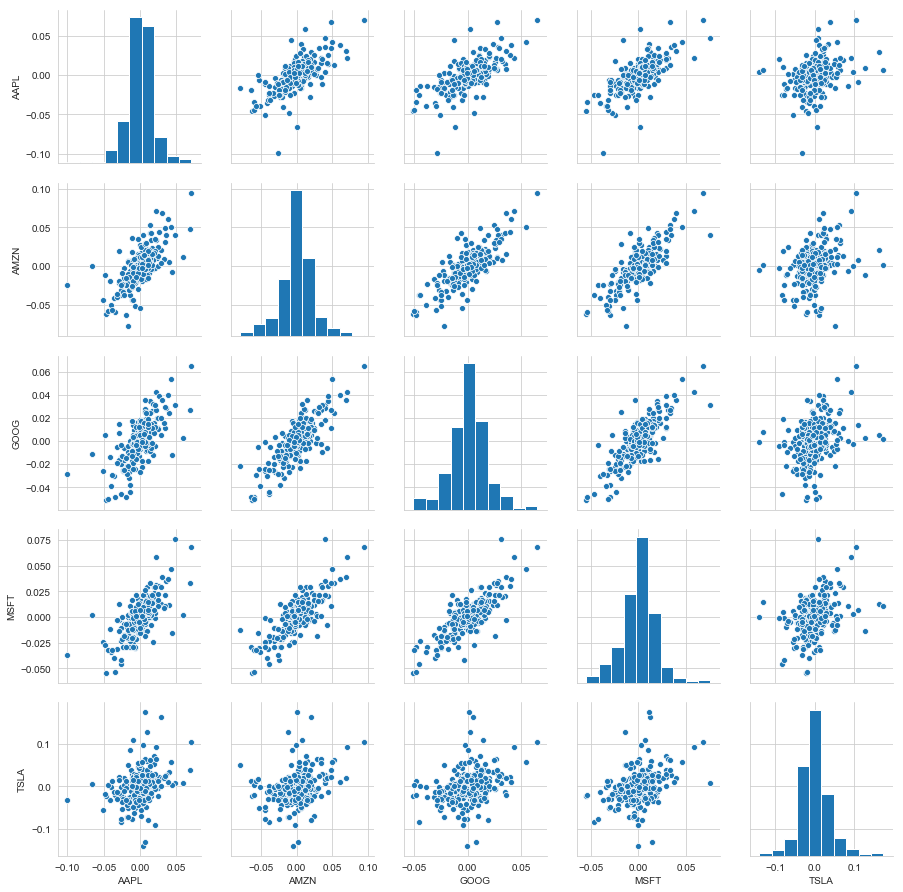

In [41]:
sns.pairplot(tech_returns.dropna(), palette="husl")

 <br><br>
 From this pair plot we can see the corelation between Microsoft and Google has the best returns <br>

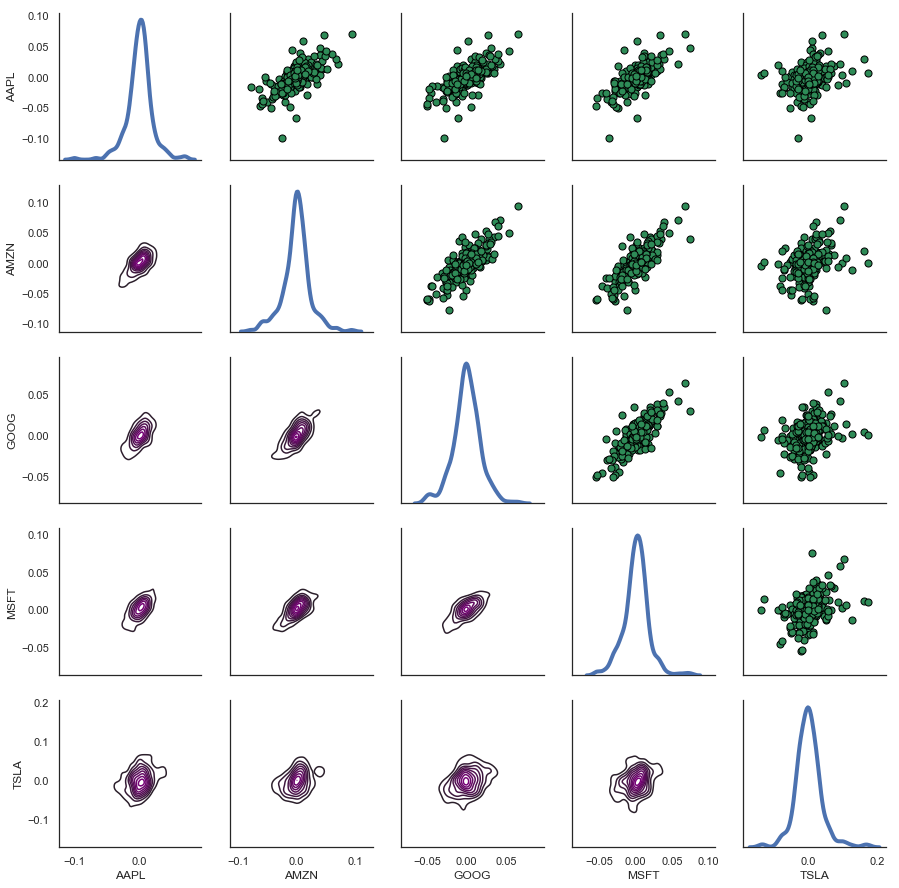

In [64]:

g = sns.PairGrid(tech_returns,diag_sharey=False, palette="GnBu_d")
g.map_upper(plt.scatter, s=50, edgecolor="black", color='seagreen', )
g.map_lower(sns.kdeplot, color = "purple")
g.map_diag(sns.kdeplot, lw=4);